<a href="https://colab.research.google.com/github/Chrisolande/Machine-Learning-and-Data-Science-Projects/blob/main/laptop_prices_analysis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

This dataset provides a comprehensive collection of information on various laptops, enabling a detailed analysis of their specifications and pricing. It encompasses a wide range of laptops, encompassing diverse brands, models, and configurations, making it a valuable resource for researchers, data analysts, and machine learning enthusiasts interested in the laptop industry.

The data comes from the spanish website PC componentes. The data was collected using Power Automate, more info on: https://github.com/juanmerino89/laptops-data-cleaning

Fields included:

* Laptop Name: The unique identifier or model name of the laptop.




* Brand: Laptop brand.
* Model: Laptop brand model.
* CPU (Central Processing Unit): The processor brand, model, and other relevant details.
* GPU (Graphics Processing Unit): The graphics card brand, model, and associated specifications.
* RAM (Random Access Memory): The amount of memory available for multitasking.
* Storage: The storage type (HDD, SSD) and capacity of the laptop.
* Price: The cost of the laptop in the respective currency.

By utilizing this dataset, researchers and analysts can explore patterns, trends, and relationships between laptop specifications and their pricing. It serves as an excellent resource for tasks such as price prediction, market analysis, and comparison of different laptop configurations. Whether you are interested in identifying the most cost-effective options or understanding the impact of specific hardware components on laptop prices, this dataset offers abundant possibilities for in-depth exploration.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
from google.colab import files


uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

Saving laptops (1).csv to laptops (1).csv


In [ ]:
df.shape

(2160, 12)

**Observation**

There are 2160 rows and 12 columns in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [ ]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [ ]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [ ]:
missing_values = pd.DataFrame({'Missing Values': df.isnull().sum(), 'Non Null Values': df.notnull().sum()})

missing_values

,Missing Values,Non Null Values
Laptop,0,2160
Status,0,2160
Brand,0,2160
Model,0,2160
CPU,0,2160
RAM,0,2160
Storage,0,2160
Storage type,42,2118
GPU,1371,789
Screen,4,2156


In [ ]:
missing_value_percentage = round((missing_values['Missing Values'].sum() / (df.shape[0] * df.shape[1])) * 100, 2)

print('The missing values account for', missing_value_percentage, '% of the entire dataset')

The missing values account for 5.47 % of the entire dataset


**Observation**

There are 1417 missing values accounting for 5.47 %

<Axes: >

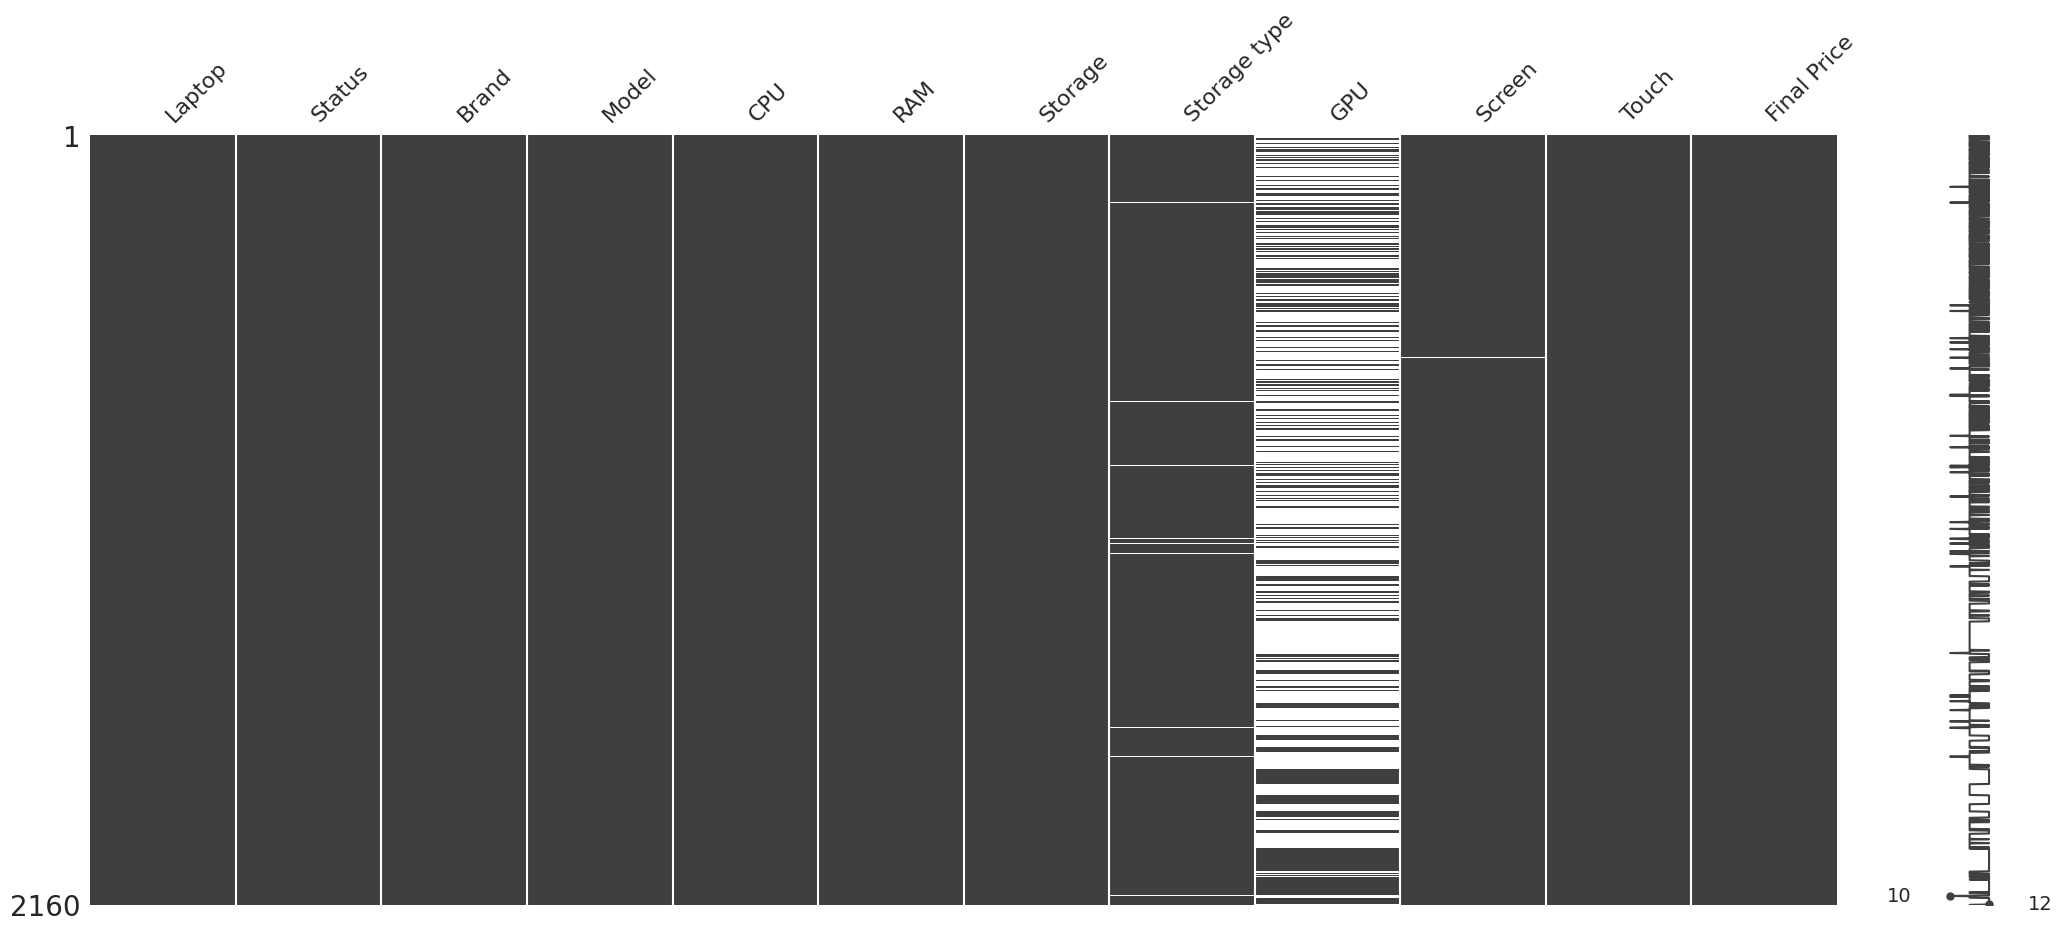

In [ ]:
import missingno as msno

msno.matrix(df)

**Observation**

The missing values are mode concentrated on the GPU column than any other column

In [ ]:
print('There are', df.duplicated().sum(), 'duplicated values in the dataset')

There are 0 duplicated values in the dataset


In [ ]:
df['Storage type'] = df['Storage type'].fillna(df['Storage type'].mode())

df['GPU'] = df['GPU'].fillna("Other")

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

# Exploratory Data Analysis

In [ ]:
df['Storage type'] = df['Storage type'].fillna('Other')

Text(0.5, 1.0, 'Storage Type')

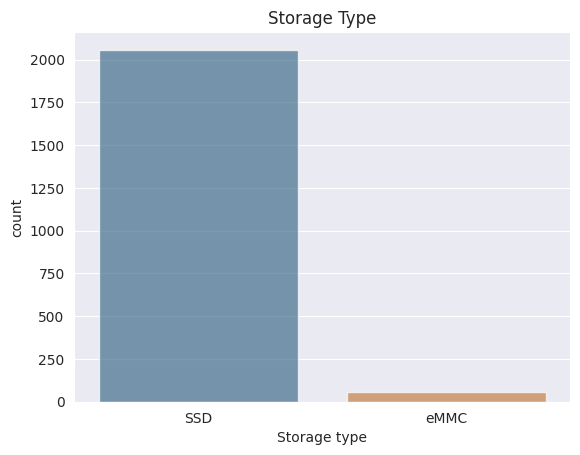

In [ ]:
sns.countplot(data=df, x= 'Storage type',alpha= 0.7, saturation= 0.5)

plt.title('Storage Type')

Text(0.5, 1.0, 'Distribution of Storage')

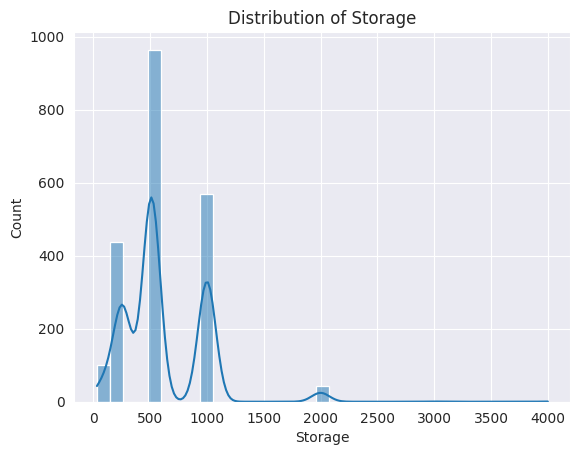

In [ ]:
sns.histplot(data= df, x= 'Storage', kde= True)

plt.title('Distribution of Storage')

In [ ]:
df['Storage'].unique()

array([ 512,  256, 1000,   64,  128, 2000,  500,   32, 4000, 3000,  240])

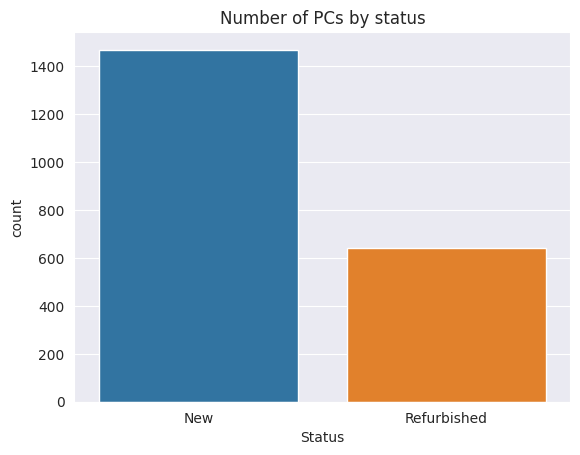

In [ ]:
sns.countplot(data= df, x= 'Status')

plt.title('Number of PCs by status')

plt.show()

In [ ]:
status_counts = df['Status'].value_counts().rename_axis('Status').reset_index(name='Count')

fig = px.pie(status_counts, names='Status', values='Count', title= 'Proportion of PC status')

fig.show()


In [ ]:
popular_brands = df['Brand'].value_counts().rename_axis('Brand').reset_index(name= 'Count')

popular_brands

,Brand,Count
0,Asus,409
1,Lenovo,361
2,HP,360
3,MSI,308
4,Acer,136
5,Apple,105
6,Dell,84
7,Microsoft,74
8,Gigabyte,48
9,Razer,37


In [ ]:
fig= px.bar(popular_brands, x= 'Count', y= 'Brand', color= 'Brand', title= 'Most Popular Brands')

fig.show()

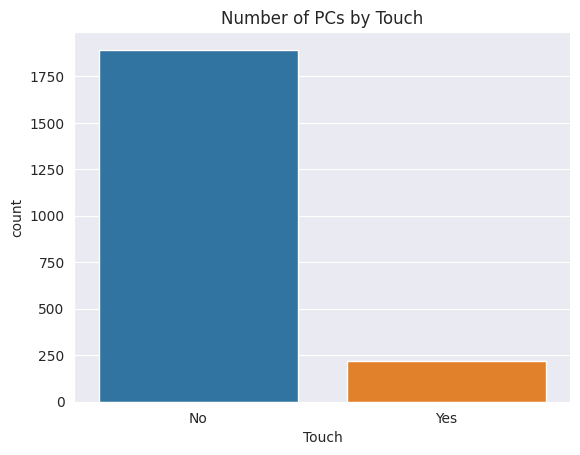

In [ ]:
sns.countplot(data= df, x= 'Touch')

plt.title('Number of PCs by Touch')

plt.show()

In [ ]:
status_counts = df['Touch'].value_counts().rename_axis('Touch').reset_index(name='Count')

fig = px.pie(status_counts, names='Touch', values='Count', title= 'Proportion of PC by Touch')

fig.show()


In [ ]:
df.Touch.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [ ]:
df['Status'].unique()

array(['New', 'Refurbished'], dtype=object)

In [ ]:
status_price= df.groupby('Status')['Final Price'].mean().reset_index()

px.bar(status_price, x='Status', y= 'Final Price',color= 'Status',
       title= 'Most expensive PCs by Status')

In [ ]:
brand_price= df.groupby('Brand')['Final Price'].mean().reset_index()

brand_price

,Brand,Final Price
0,Acer,1004.787941
1,Alurin,470.825600
2,Apple,1684.613048
3,Asus,1276.391345
4,Deep Gaming,1505.377500
5,Dell,1153.839881
6,Denver,329.950000
7,Dynabook Toshiba,999.197895
8,Gigabyte,1698.488958
9,HP,958.003694


Text(0.5, 1.0, 'Lollipop Chart for most expensive Brands')

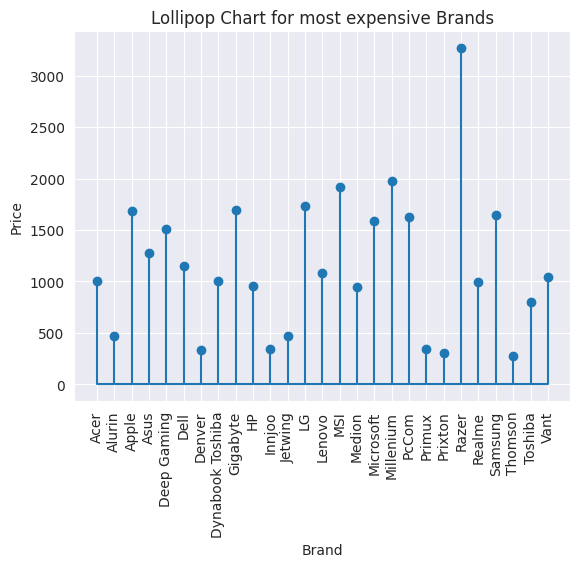

In [ ]:
plt.stem(brand_price['Brand'], brand_price['Final Price'],basefmt= '')

plt.xticks(rotation= 90)

plt.xlabel('Brand')

plt.ylabel('Price')

plt.title('Lollipop Chart for most expensive Brands')

In [ ]:
df['Model'].unique()

array(['ExpertBook', 'Go', 'Katana', '15S', 'Crosshair', 'ThinkPad',
       'VivoBook', 'Akoya', 'Victus', 'V15', 'Thin', 'ROG', 'IdeaPad',
       'Cyborg', 'M515UA', 'TUF', 'Aspire', 'Pavilion', 'Vector',
       'Chromebook', 'Omen', 'ZenBook', 'Creator', 'MacBook Air',
       'ThinkBook', '250', 'Modern', '255', 'MacBook Pro', 'Prestige',
       'Stealth', 'Pulse', 'Blade', 'Legion', 'Raider', 'ProBook', 'F515',
       'G5', 'Vostro', 'Nitro', 'Gram', 'E410', 'Bravo', 'Aero', 'Yoga',
       'Galaxy Book', 'Erazer', 'Summit', 'Ultra', 'Extensa', 'Flex',
       'EliteBook', 'Revolt', 'Latitude', 'Envy', 'Deputy', 'Predator',
       'Surface Laptop', 'Flex Advance', '14w', 'Titan', 'Ioxbook',
       'Aorus', 'Swift', 'Surface Go', 'Netbook Pro', 'Surface Pro',
       'Notebook', '470', 'Spectre', 'Satellite Pro', 'XPS', 'ConceptD',
       'E510', 'Beast', 'TravelMate', 'Portégé', 'Tecra', 'Neo',
       'Electronics', '14S', 'Classmate Pro', '17', 'Zbook', 'BR', '300w',
       'M515', 'N

In [ ]:
model_price = df.groupby('Model')['Final Price'].mean().reset_index()

model_price  = model_price.nlargest(10, 'Final Price').reset_index(drop= True)

model_price

,Model,Final Price
0,Titan,4183.334286
1,WS63,3900.500000
2,Enduro,3442.000000
3,Blade,3349.456571
4,Beast,3199.003333
5,Raider,3035.109412
6,ProArt,2846.000000
7,Zbook,2810.635238
8,14w,2705.005000
9,Vector,2644.727778


Text(0.5, 1.0, 'Lollipop Chart for most expensive Models')

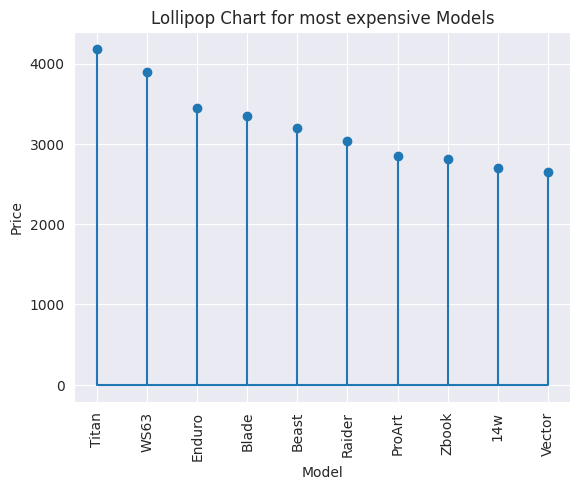

In [ ]:
plt.stem(model_price['Model'], model_price['Final Price'],basefmt= '')

plt.xticks(rotation= 90)

plt.xlabel('Model')

plt.ylabel('Price')

plt.title('Lollipop Chart for most expensive Models')

In [ ]:
cpu_price = df.groupby('CPU')['Final Price'].mean().reset_index()

cpu_price = cpu_price.nlargest(10, 'Final Price').reset_index(drop= True)

cpu_price

,CPU,Final Price
0,AMD Radeon 9,5192.110000
1,Intel Evo Core i9,3699.010000
2,Intel Core i9,3350.067340
3,Apple M2 Pro,2860.543077
4,Apple M1 Pro,2703.861429
5,AMD Ryzen 9,2481.034773
6,Qualcomm Snapdragon 8,1997.000000
7,Apple M2,1911.144643
8,Intel Evo Core i7,1908.773049
9,Intel Core i7,1650.693429


In [ ]:
px.bar(cpu_price, x= 'Final Price', y= 'CPU', title= 'Most Expensive CPU Types',color= 'CPU')

In [ ]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [ ]:
df['Touch'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.isna().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

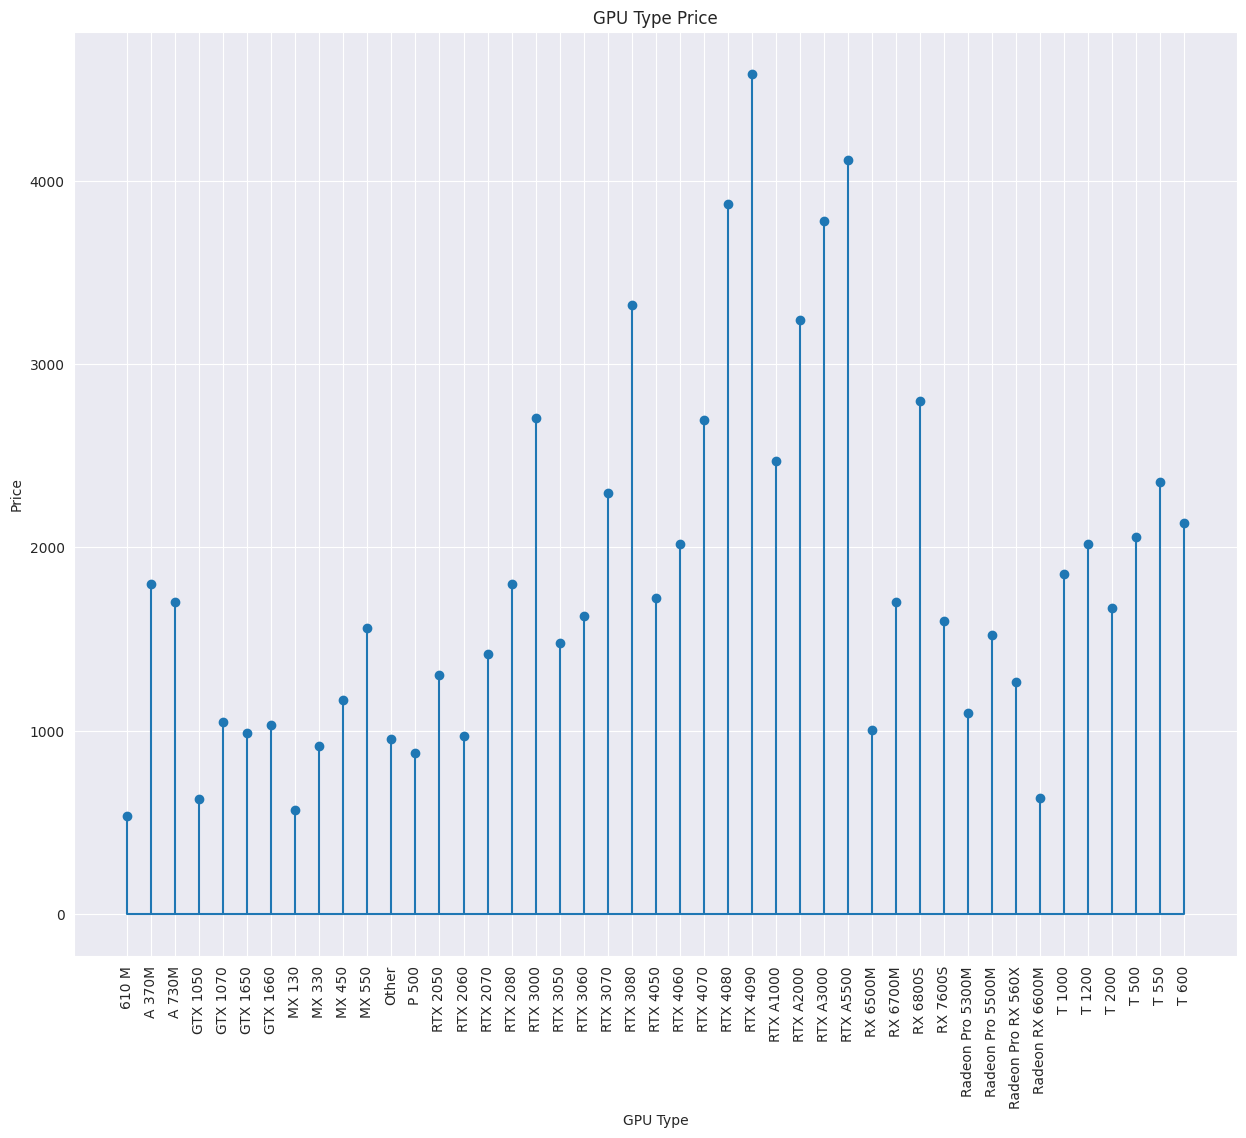

In [ ]:
gpu_price= df.groupby('GPU')['Final Price'].mean().reset_index()

plt.figure(figsize= (15,12))

plt.stem(gpu_price['GPU'], gpu_price['Final Price'],basefmt= '')

plt.xticks(rotation= 90)

plt.xlabel('GPU Type')

plt.ylabel('Price')

plt.title('GPU Type Price')

plt.show()

Text(0.5, 1.0, 'Distribution of Screen')

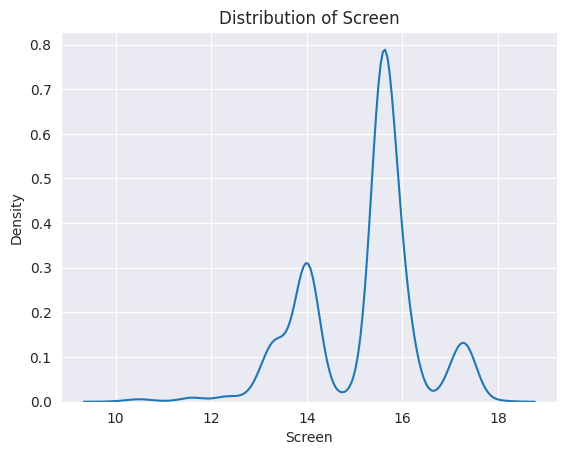

In [ ]:
sns.kdeplot(data= df, x= 'Screen')

plt.title('Distribution of Screen')

<Axes: xlabel='Final Price', ylabel='Screen'>

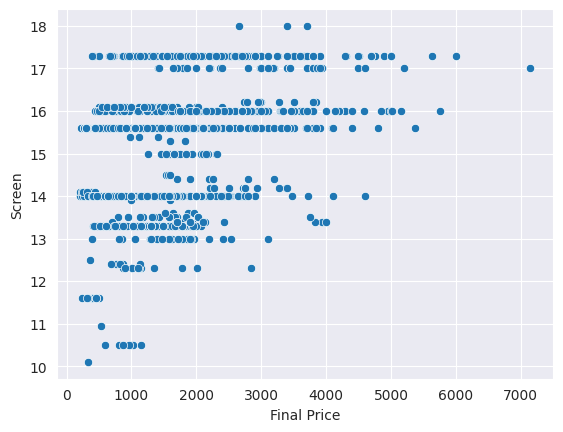

In [ ]:
sns.scatterplot(data= df, x='Final Price', y= 'Screen')

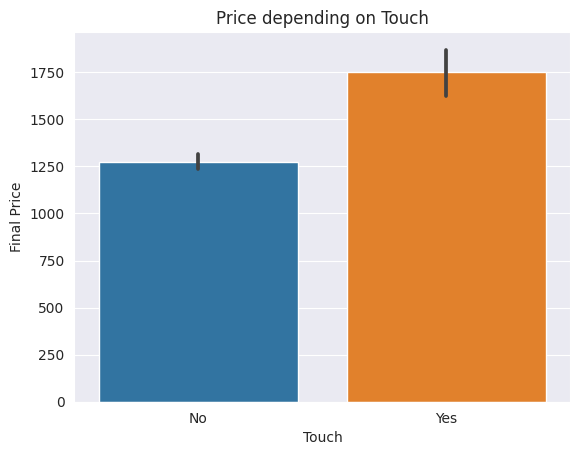

In [ ]:
sns.barplot(data= df, x= 'Touch', y= 'Final Price')

plt.title('Price depending on Touch')

plt.show()

<Axes: >

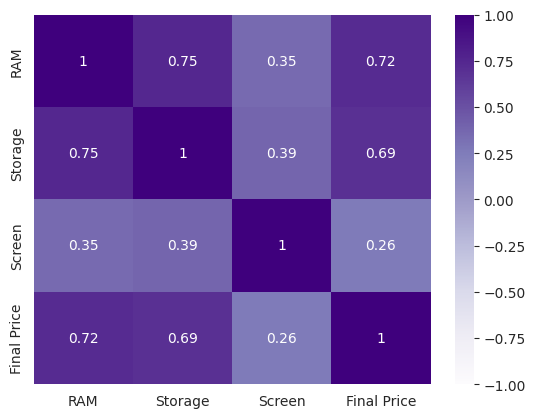

In [ ]:
numeric_data = df.select_dtypes(include= 'number')

numeric_corr = numeric_data.corr()

sns.heatmap(numeric_corr, cmap= 'Purples', vmin= -1, vmax= 1, annot= True)

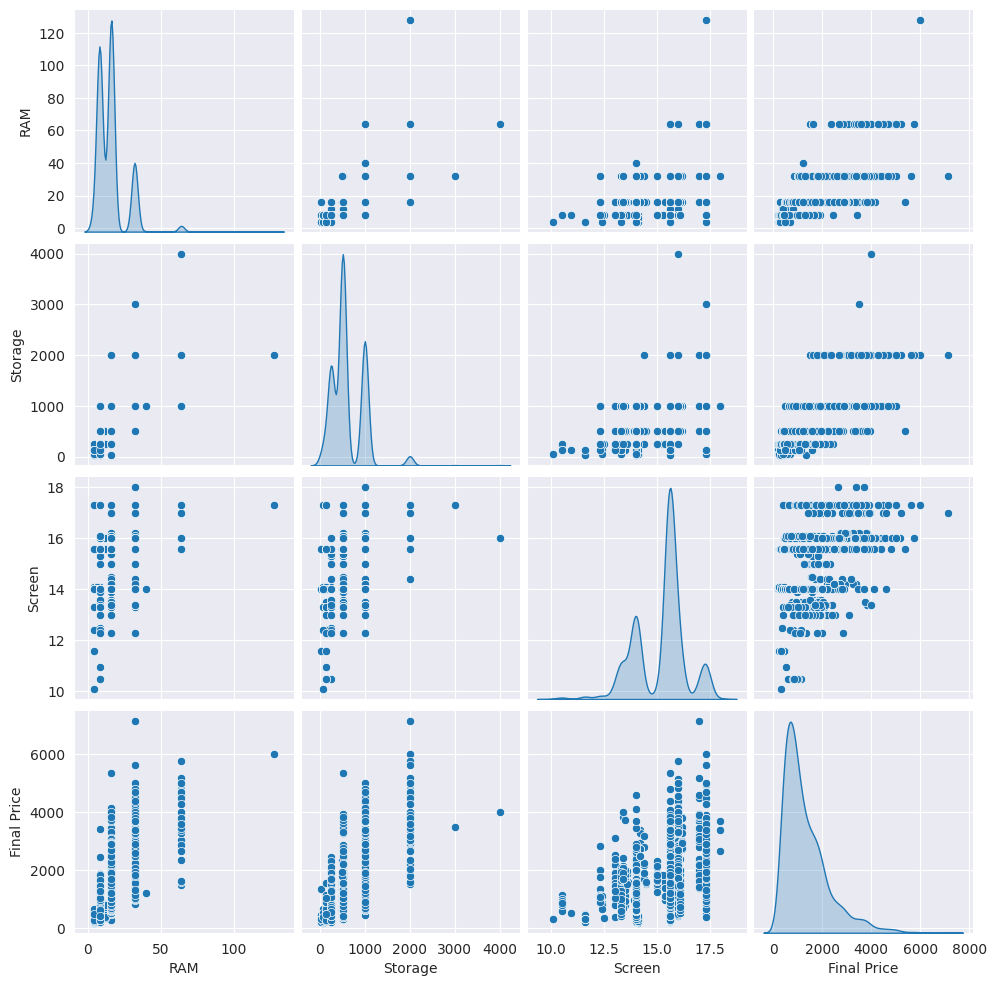

In [ ]:
sns.pairplot(df, diag_kind= 'kde')

**Observation**

1. Most Laptops have SSDs as their primary storage

2. There are multiple Gaussians in storage indicating the presence of Clusters

3. Most Laptops are refurbished accounting for a total percentage of 69.5

4. Asus, Lenovo, HP, MSI and Acer are the most popular brands

5. Most Laptops are non - touch and they account for 89.5% of the total Laptops

6. Refurbished Laptops cost more on average compared to newer ones ($1333.44)

7. Razer, Millenium, Samsung and Microsoft are four of the most expensive brands

8. Titan, WS63, Enduro, Blade, Beast are the most expensive models

9. AMD Radeon 9, Intel Euo core i9, intel core i9 and Apple M2 Pro are the most expensive CPU's on average

10. There are multiple Gaussians in the screens an indication of clusters in the screen

11. Laptops with Touch cost more than those without touch


Checking if the data are normally distributed using hypothesis

Feature: RAM
T- Statistic: 0.7061525583267212
P value: 0.0
The data is not normally distributed
--------------------------------------------
Feature: Storage
T- Statistic: 0.7884469628334045
P value: 0.0
The data is not normally distributed
--------------------------------------------
Feature: Screen
T- Statistic: 0.8767241835594177
P value: 5.23295349375541e-38
The data is not normally distributed
--------------------------------------------
Feature: Final Price
T- Statistic: 0.8535596132278442
P value: 1.6442555920694539e-40
The data is not normally distributed
--------------------------------------------


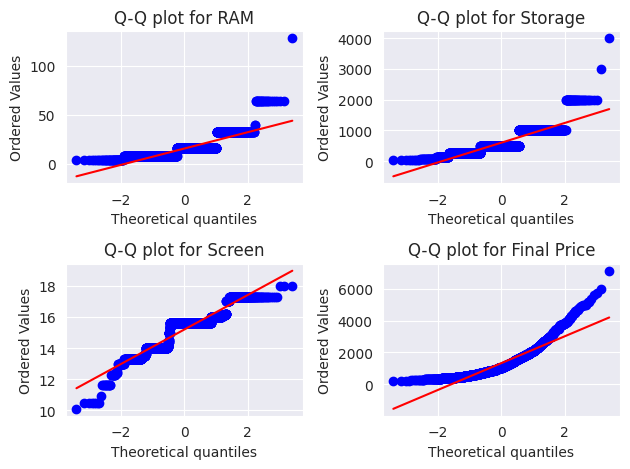

In [ ]:
from scipy import stats

features = numeric_data.columns

num_features = len(numeric_data.columns)

num_cols= 2

num_rows = (num_features + num_cols- 1) // num_cols

for i, feature in enumerate(features):

    plt.subplot(num_rows, num_cols, i+1)

    data = df[feature]

    stat, p = stats.shapiro(data) #Utilizing the Shapiro-Wilk Test for hypothesis testing for normal Distribution

    print(f"Feature: {feature}")

    print("T- Statistic:", stat)

    print("P value:", p)


    if p > 0.05:

        print("The data is normally distributed")

    else:

        print("The data is not normally distributed")


    print("--------------------------------------------")


    stats.probplot(data, plot= plt)

    plt.title(f"Q-Q plot for {feature}")

plt.tight_layout()

plt.show()

Log Transformation

In [ ]:
for feature in features:

    df[feature] = np.log1p(df[feature])

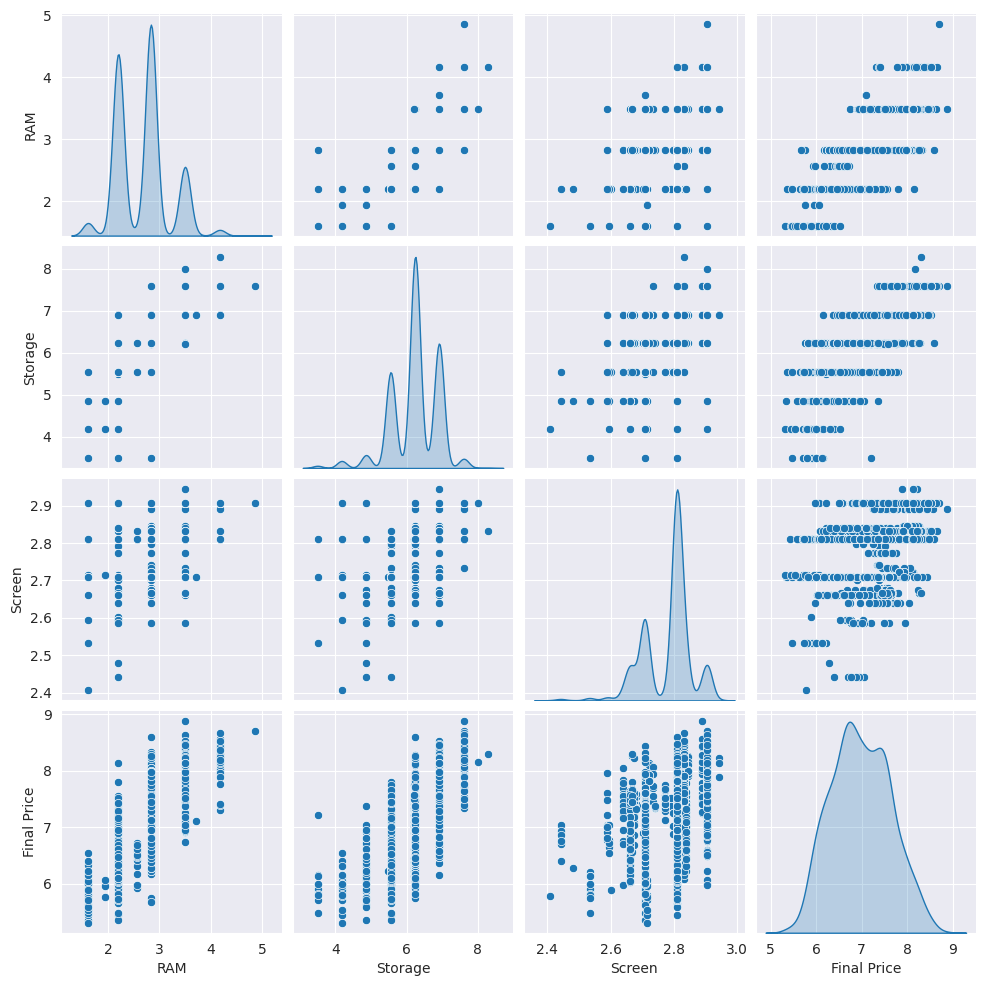

In [ ]:
sns.pairplot(df, diag_kind= 'kde')

**Diagonal Analysis**

1. RAM has 5 Gaussians which may indicate presence of 5 clusters

2. Storage and Screen also have multiple Gaussians indicating presence of multiple clusters

3. The final Price show an almost perfect Normal distribution

**Relationship between the Dependent and Independent Variables**

1. Final Price v RAM: The higher the RAM the higher the final price

2. Final Price v Storage: Laptops with a higher storage cost more



# Data Modelling

In [ ]:
#Importing Necessary Modules for Data Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet



In [ ]:
#Dropping the Laptop column since it isnt helpful in the data modelling

df.drop(columns= 'Laptop', inplace= True)

In [ ]:
object_columns = df.select_dtypes(include='object').columns

object_columns

Index(['Status', 'Brand', 'Model', 'CPU', 'Storage type', 'GPU', 'Touch'], dtype='object')

In [ ]:
#Label Encoding the Categorical Features since they are ordinal in nature

encoder = LabelEncoder()

for feature in object_columns:

  df[feature] = encoder.fit_transform(df[feature])

In [ ]:
df.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,0,3,41,16,2.197225,6.240276,0,11,2.809403,0,6.917706
1,0,1,53,13,2.197225,5.549076,0,11,2.809403,0,5.703782
2,0,3,41,15,2.197225,5.549076,0,11,2.809403,0,6.672033
3,0,14,57,17,2.833213,6.908755,0,18,2.809403,0,7.090077
4,0,9,4,16,2.833213,6.240276,0,11,2.809403,0,6.507293


In [ ]:
#Separating the Target from the features and splitting it into training and testing data

X = df.drop(columns= 'Final Price')

y = df['Final Price']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state= 0, test_size= 0.2, shuffle= True)

print('X Train shape: ', X_train.shape)

print('X Test shape: ', X_test.shape)

print('y Train shape: ', y_train.shape)

print('y Test shape: ', y_test.shape)

X Train shape:  (1691, 10)
X Test shape:  (423, 10)
y Train shape:  (1691,)
y Test shape:  (423,)


## **Linear Regression**

In [ ]:
from sklearn.metrics import *

lr = LinearRegression()

lr.fit(X_train, y_train)

ypred_train = lr.predict(X_train)

ypred_test = lr.predict(X_test)

#Metrics

linear_rmse_test = mean_squared_error(y_test, ypred_test, squared= False)

linear_r2_score_test = r2_score(y_test, ypred_test)

linear_r2_score_train = r2_score(y_train, ypred_train)

#K fold cross-validation

k = 5

kfold_linear = KFold(n_splits= k, random_state= 0, shuffle= True)

cv_linear = cross_val_score(lr, X, y, cv = kfold_linear, scoring= 'r2')

print('Linear Regression RMSE(Train):', linear_rmse_test)

print('Linear Regression R2 score (Train):', linear_r2_score_train)

print('Linear Regression R2 score (Test):', linear_r2_score_test)

print('Linear Regression CV Score mean(R^2):', cv_linear.mean())

Linear Regression RMSE(Train): 0.3473661809342267
Linear Regression R2 score (Train): 0.6992793722107102
Linear Regression R2 score (Test): 0.6928461622968403
Linear Regression CV Score mean(R^2): 0.6937706822910943


## **Lasso Regression**

In [ ]:
lasso = Lasso(alpha= 0.1)

lasso.fit(X_train, y_train)

lasso_ypred_train = lasso.predict(X_train)

lasso_ypred_test = lasso.predict(X_test)

#Metrics

lasso_r2_score_test = r2_score(y_test, lasso_ypred_test)

lasso_r2_score_train = r2_score(y_train, lasso_ypred_train)

lasso_coeffs = lasso.coef_

#Print them

print('Lasso R^2 score(Test):', lasso_r2_score_test)

print('Lasso R^2 score(Train):', lasso_r2_score_train)

print('Lasso Coefficients:', lasso_coeffs)

Lasso R^2 score(Test): 0.5619626602836991
Lasso R^2 score(Train): 0.5394080507930832
Lasso Coefficients: [-0.          0.00835765  0.00285718  0.02292429  0.06607655  0.17054861
 -0.          0.04233238 -0.          0.        ]


## **Ridge Regression**

In [ ]:
ridge = Ridge(alpha= 0.1)

ridge.fit(X_train, y_train)

ridge_ypred_train = ridge.predict(X_train)

ridge_ypred_test = ridge.predict(X_test)

#Metrics

ridge_r2_score_test = r2_score(y_test, ridge_ypred_test)

ridge_r2_score_train = r2_score(y_train, ridge_ypred_train)


ridge_coeffs = ridge.coef_

#Print them

print('Ridge R^2 score(Test):', ridge_r2_score_test)

print('Ridge R^2 score(Train):', ridge_r2_score_train)

print('Ridge Coefficients:', ridge_coeffs)

Ridge R^2 score(Test): 0.6929584563389937
Ridge R^2 score(Train): 0.6992775872946005
Ridge Coefficients: [-0.1129539   0.00434657  0.00112812  0.01271483  0.57179935  0.28098659
  0.02702567  0.02485981 -0.87904896  0.25946078]


## **ElasticNet Regression**

In [ ]:
ent = ElasticNet(alpha= 0.1, l1_ratio = 0.5) #Adjusting the alpha and l1-ratio as required

ent.fit(X_train, y_train)

ent_ypred_train = ent.predict(X_train)

ent_ypred_test = ent.predict(X_test)

#Metrics

ent_r2_score_train = r2_score(y_train, ent_ypred_train)

ent_r2_score_test = r2_score(y_test, ent_ypred_test)

ent_rmse = (mean_squared_error(y_test, ent_ypred_test,squared= False))

k = 5

ent_kfold = KFold(n_splits= k, random_state= 0, shuffle= True)

ent_cross_val = cross_val_score(estimator= ent,scoring= 'r2', X=X, y=y,cv= ent_kfold,n_jobs= -1)

#Printing the metrics

print('ElasticNet Regression R^2 (train): ', ent_r2_score_train)

print('ElasticNet Regression R^2 (test): ', ent_r2_score_test)

print('ElasticNet Regression RMSE: ', ent_rmse)

print('ElasticNet Regression Cross Validation Score:', ent_cross_val.mean())


ElasticNet Regression R^2 (train):  0.614722426724357
ElasticNet Regression R^2 (test):  0.6262120074244222
ElasticNet Regression RMSE:  0.38319711789383815
ElasticNet Regression Cross Validation Score: 0.609033986307205


## **Xtreme Gradient Boosting Model**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective= "reg:squarederror", n_estimators= 100)

xgb_model.fit(X_train, y_train)

xgb_model_ypred_train = xgb_model.predict(X_train)

xgb_model_ypred_test = xgb_model.predict(X_test)

### **HyperParameter Tuning for Xtreme Gradent Boosting model**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10],

             "lambda": [0.001, 0.01, 0.1, 1, 10],

              "gamma": [0.001, 0.01, 0.1, 1, 10],

              "n_estimators": [50,100,150],

              "max_depth" : [2,4,6]

             }

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search_xgb = GridSearchCV(estimator= xgb_model, param_grid= param_grid,cv= 5, n_jobs= -1)

grid_search_xgb.fit(X_train, y_train)

print(grid_search_xgb.best_params_)

{'alpha': 0.1, 'gamma': 0.01, 'lambda': 1, 'max_depth': 4, 'n_estimators': 150}


In [ ]:
rand_search = RandomizedSearchCV(estimator= xgb_model, param_distributions= param_grid, cv= 5, n_jobs= -1)

rand_search.fit(X_train, y_train)

print(rand_search.best_params_)

{'n_estimators': 100, 'max_depth': 4, 'lambda': 1, 'gamma': 0.01, 'alpha': 1}


### Implementing with the Grid Search CV

In [ ]:
xgb_model = xgb.XGBRegressor(objective= "reg:squarederror",
                             alpha= 0.01,
                             gamma= 0.01,
                             reg_lambda= 0.1,
                             max_depth= 6,
                             n_estimators= 150)

xgb_model.fit(X_train, y_train)

xgb_model_ypred_train = xgb_model.predict(X_train)

xgb_model_ypred_test = xgb_model.predict(X_test)

xgb_grid_r2_train = r2_score(y_train, xgb_model_ypred_train)

xgb_grid_r2_test = r2_score(y_test, xgb_model_ypred_test)

xgb_grid_rmse_test = mean_squared_error(y_test, xgb_model_ypred_test, squared=False)

#Cross Validation

k = 5

xgb_kfold = KFold(n_splits= k, shuffle= True, random_state= 0)

xgb_grid_cv = cross_val_score(estimator= xgb_model, cv= xgb_kfold, scoring= 'r2', X=X, y=y)


print("XGBoost Regression (Train) - R^2:", xgb_grid_r2_train)

print("XGBoost Regression (Test) - R^2:", xgb_grid_r2_test)

print("XGBoost Regression (Test) - RMSE:", xgb_grid_rmse_test)

print("XGBoost Regression CV Score:", xgb_grid_cv.mean())

XGBoost Regression (Train) - R^2: 0.958895075715245
XGBoost Regression (Test) - R^2: 0.8362817937243785
XGBoost Regression (Test) - RMSE: 0.25360513904090953
XGBoost Regression CV Score: 0.8713137762335259


Implementing with the Randomized Search CV

In [ ]:
xgb_model = xgb.XGBRegressor(objective= "reg:squarederror",
                             alpha= 0.01, gamma= 0.001,
                             reg_lambda= 10,
                             max_depth= 4,
                             n_estimators= 50)

xgb_model.fit(X_train, y_train)

xgb_model_ypred_train = xgb_model.predict(X_train)

xgb_model_ypred_test = xgb_model.predict(X_test)

xgb_rand_r2_train = r2_score(y_train, xgb_model_ypred_train)

xgb_rand_r2_test = r2_score(y_test, xgb_model_ypred_test)

xgb_rand_rmse_test = mean_squared_error(y_test, xgb_model_ypred_test, squared=False)

#Cross Validation

k = 5

xgb_kfold = KFold(n_splits= k, shuffle= True, random_state= 0)

xgb_rand_cv = cross_val_score(estimator= xgb_model, cv= xgb_kfold, scoring= 'r2', X=X, y=y)


print("XGBoost Regression (Train) - R^2:", xgb_rand_r2_train)

print("XGBoost Regression (Test) - R^2:", xgb_rand_r2_test)

print("XGBoost Regression (Test) - RMSE:", xgb_rand_rmse_test)

print("XGBoost Regression CV Score:", xgb_rand_cv.mean())

XGBoost Regression (Train) - R^2: 0.9105753014265676
XGBoost Regression (Test) - R^2: 0.8456339704339945
XGBoost Regression (Test) - RMSE: 0.24625521014236015
XGBoost Regression CV Score: 0.8693147523384226


**Implementation on the Training Validation and Test Data**

In [ ]:
df_copy= df.copy()

Xcopy = df_copy.drop(columns= 'Final Price')

ycopy = df['Final Price']

#Splitting the data into temporary train and test data

Xcopy_temp, Xcopy_test, ycopy_temp, ycopy_test = train_test_split(Xcopy, ycopy, test_size= 0.2, random_state= 0, shuffle= True)

#Splitting the Temporary data into Validation and Final Sets

Xcopy_train, Xcopy_val, ycopy_train, ycopy_val = train_test_split(Xcopy_temp, ycopy_temp, test_size= 0.2, shuffle= True)

print("Xcopy_train shape:", Xcopy_train.shape)

print("ycopy_train shape:", ycopy_train.shape)

print("Xcopy_val shape:", Xcopy_val.shape)

print("ycopy_val shape:", ycopy_val.shape)

print("Xcopy_test shape:", Xcopy_test.shape)

print("ycopy_test shape:", ycopy_test.shape)

Xcopy_train shape: (1352, 10)
ycopy_train shape: (1352,)
Xcopy_val shape: (339, 10)
ycopy_val shape: (339,)
Xcopy_test shape: (423, 10)
ycopy_test shape: (423,)


In [ ]:
#fitting the xgboost model to the training, testing and validating sets

xgb_model = xgb.XGBRegressor(objective= "reg:squarederror",
                             alpha= 0.1,
                             gamma= 0.01,
                             reg_lambda= 1,
                             max_depth= 4,
                             n_estimators= 150)

#Implementation on the training set

xgb_model.fit(Xcopy_train, ycopy_train)

#Prediction on the training and validation set

xgb_ypred_train = xgb_model.predict(Xcopy_train)

xgb_ypred_val = xgb_model.predict(Xcopy_val)


# Calculate metrics for the training and validation sets

xgb_rmse_val = mean_squared_error(ycopy_val, xgb_ypred_val, squared=False)

xgb_r2_train = r2_score(ycopy_train, xgb_ypred_train)

xgb_r2_val = r2_score(ycopy_val, xgb_ypred_val)

print("XGBoost Regression (Train) - R^2:", xgb_r2_train)

print("XGBoost Regression (Validation) - R^2:", xgb_r2_val)

print("XGBoost Regression (Validation) - RMSE:", xgb_rmse_val)

# Predict on the test set

xgb_ypred_test = xgb_model.predict(Xcopy_test)

# Calculate metrics for the test set

xgb_rmse_test = mean_squared_error(ycopy_test, xgb_ypred_test, squared=False)

xgb_r2_test = r2_score(ycopy_test, xgb_ypred_test)

print("XGBoost Regression (Test) - R^2:", xgb_r2_test)

print("XGBoost Regression (Test) - RMSE:", xgb_rmse_test)



XGBoost Regression (Train) - R^2: 0.942396919260521
XGBoost Regression (Validation) - R^2: 0.8826931685446027
XGBoost Regression (Validation) - RMSE: 0.2235069631772927
XGBoost Regression (Test) - R^2: 0.8547245918551366
XGBoost Regression (Test) - RMSE: 0.23889420395876954


**Model Evaluation using OLS and VIF**

In [ ]:
import statsmodels.formula.api as smf

model1 = smf.ols("y~X", data=df).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     487.5
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:21:04   Log-Likelihood:                -796.68
No. Observations:                2114   AIC:                             1615.
Df Residuals:                    2103   BIC:                             1678.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3831      0.341     15.792      0.000       4.715       6.052
X[0]          -0.1116      0.017     -6.519      0.000      -0.145      -0.078
X[1]           0.0044      0.001      3.170      0.002       0.002       0.007
X[2]           0.0010      0.000      4.319      0.000       0.001       0.001
X[3]           0.0136      0.002      7.234      0.000       0.010       0.017
X[4]           0.5536      0.026     21.598      0.000       0.503       0.604
X[5]           0.2767      0.022     12.666      0.000       0.234       0.320
X[6]          -0.0071      0.058     -0.123      0.902      -0.121       0.106
X[7]           0.0258      0.002     16.413      0.000       0.023       0.029
X[8]          -0.8144      0.127     -6.389      0.000      -1.064      -0.564
X[9]           0.2734      0.028      9.779      0.000       0.219       0.328
==============================================================================
Omnibus:                       72.874   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.486
Skew:                           0.438   Prob(JB):                     2.02e-18
Kurtosis:                       3.395   Cond. No.                     3.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

independent_vars = df.drop(columns='Final Price').columns

vif_data = pd.DataFrame(columns=['Variable', 'VIF'])

for var in independent_vars:

    X = df.drop(columns=[var, 'Final Price'])

    y = df[var]

    X = sm.add_constant(X)

    model = sm.OLS(y, X)

    rsquared = model.fit().rsquared

    vif = 1 / (1 - rsquared)

    vif_data = vif_data.append({'Variable': var, 'VIF': vif}, ignore_index=True)

vif_data


,Variable,VIF
0,Status,1.049665
1,Brand,1.061823
2,Model,1.103015
3,CPU,1.129357
4,RAM,2.804270
5,Storage,3.326240
6,Storage type,1.461564
7,GPU,1.464125
8,Screen,1.546482
9,Touch,1.236968


**Gradient and Hybrid Models**

In [ ]:
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

models = [
         ('Gradient Boosting Regressor', GradientBoostingRegressor()),

         ('Support Vector Regressor', SVR()),

         ('Ada Boost Regressor', AdaBoostRegressor())

        ]
k = 5

kfold = KFold(n_splits= k, shuffle= True, random_state= 0)

for name, model in models:

    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)

    ypred_test = model.predict(X_test)

    rmse_test = np.sqrt(mean_squared_error(y_test, ypred_test))

    r2_test = r2_score(y_test, ypred_test)

    r2_train = r2_score(y_train, ypred_train)

    cv = cross_val_score(estimator= model, cv= kfold, X=X, y=y, scoring= 'r2')

    print(f"Model: {name}")

    print(f"{name} RMSE (Test):", rmse_test)

    print(f"{name} R^2 (Train):", r2_train)

    print(f"{name} R^2 (Test):", r2_test)

    print(f"{name} Cross Validation Mean:", cv.mean())

    print("------------------------------------------------------------------------")

Model: Gradient Boosting Regressor
Gradient Boosting Regressor RMSE (Test): 0.2579047789917253
Gradient Boosting Regressor R^2 (Train): 0.8828888560409462
Gradient Boosting Regressor R^2 (Test): 0.8306833537428335
Gradient Boosting Regressor Cross Validation Mean: 0.4991047156678766
------------------------------------------------------------------------
Model: Support Vector Regressor
Support Vector Regressor RMSE (Test): 0.3977617674452743
Support Vector Regressor R^2 (Train): 0.5829699787103915
Support Vector Regressor R^2 (Test): 0.5972579729022283
Support Vector Regressor Cross Validation Mean: 0.00714837840855771
------------------------------------------------------------------------
Model: Ada Boost Regressor
Ada Boost Regressor RMSE (Test): 0.348564133187763
Ada Boost Regressor R^2 (Train): 0.73675363353283
Ada Boost Regressor R^2 (Test): 0.6907239631217049
Ada Boost Regressor Cross Validation Mean: 0.27448055506831914
----------------------------------------------------------

In [ ]:
param_grid = {
    'n_estimators': [100,200,300,400,500,600],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]

}

In [ ]:
gbr = GradientBoostingRegressor(random_state= 0)

gbr_grid = GridSearchCV(estimator= gbr,n_jobs=-1, param_grid= param_grid, cv= 5, scoring= 'neg_mean_squared_error')

gbr_grid.fit(X_train, y_train)

print(gbr_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
gbr_best = GradientBoostingRegressor(learning_rate= 0.1,
                                     max_depth= 4,
                                     min_samples_leaf= 3,
                                     min_samples_split= 2,
                                     n_estimators= 500)

gbr_best.fit(X_train, y_train)

gbr_ypred_train = gbr_best.predict(X_train)

gbr_ypred_test = gbr_best.predict(X_test)

gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_ypred_test))

gbr_r2_score_train = r2_score(y_train, gbr_ypred_train)

gbr_r2_score_test = r2_score(y_test, gbr_ypred_test)

k = 5

gbr_kfold = KFold(n_splits= k, shuffle= True, random_state= 0)

gbr_cv = cross_val_score(estimator= gbr_best, scoring= 'r2', X= X_train, y= y_train, cv= gbr_kfold, n_jobs= -1)

print("Gradient Boosting Regressor RMSE:", gbr_rmse)

print("Gradient Boosting Regressor R^2 score (Train):", gbr_r2_score_train)

print("Gradient Boosting Regressor R^2 score (Test):", gbr_r2_score_test)

print("Gradient Boosting Regressor CV score (Train):", gbr_cv.mean())

Gradient Boosting Regressor RMSE: 0.23973046401592996
Gradient Boosting Regressor R^2 score (Train): 0.9493012765730323
Gradient Boosting Regressor R^2 score (Test): 0.8537057252917621
Gradient Boosting Regressor CV score (Train): 0.8840404960616663


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:

  print(f"working on {kernel} kernel")

  svr_model = SVR(kernel=kernel)

  svr_model.fit(X_train, y_train)

  svr_ypred_train = svr_model.predict(X_train)

  svr_ypred_test = svr_model.predict(X_test)

  svr_model_rmse = np.sqrt(mean_squared_error(y_test, svr_ypred_test))

  svr_model_r2_score_train = r2_score(y_train, svr_ypred_train)

  svr_model_r2_score_test = r2_score(y_test, svr_ypred_test)

  k = 5

  svr_model_kfold = KFold(n_splits= k, shuffle= True, random_state= 0)

  svr_model_cv = cross_val_score(estimator= svr_model,
                                 scoring= 'r2',
                                 X= X_train,
                                 y= y_train,
                                 cv= svr_model_kfold,
                                 n_jobs= -1)

  print("Support Vector Regressor RMSE:", svr_model_rmse)

  print("Support Vector Regressor R^2 score (Train):", svr_model_r2_score_train)

  print("Support Vector Regressor R^2 score (Test):", svr_model_r2_score_test)

  print("Support Vector Regressor CV score (Train):", svr_model_cv.mean())

  print("--------------------------------------------------------------------")


working on linear kernel
Support Vector Regressor RMSE: 0.3459077545366235
Support Vector Regressor R^2 score (Train): 0.6945931267827921
Support Vector Regressor R^2 score (Test): 0.695419935454759
Support Vector Regressor CV score (Train): 0.6870751989720134
--------------------------------------------------------------------
working on poly kernel
Support Vector Regressor RMSE: 0.41815012435795285
Support Vector Regressor R^2 score (Train): 0.5389649695470188
Support Vector Regressor R^2 score (Test): 0.5549125603135387
Support Vector Regressor CV score (Train): 0.5120484354271622
--------------------------------------------------------------------
working on rbf kernel
Support Vector Regressor RMSE: 0.3977617674452743
Support Vector Regressor R^2 score (Train): 0.5829699787103915
Support Vector Regressor R^2 score (Test): 0.5972579729022283
Support Vector Regressor CV score (Train): 0.5563428220746509
--------------------------------------------------------------------
working on s

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state= 0)

dt.fit(X_train, y_train)

ypred_train= dt.predict(X_train)

ypred_test= dt.predict(X_test)

dt_rmse= mean_squared_error(y_test, ypred_test,squared= False)

dt_r2_test= r2_score(y_test, ypred_test)

dt_r2_train= r2_score(y_train, ypred_train)

k= 5

dt_kfold= KFold(n_splits=k, random_state=0, shuffle= True)

dt_cv= cross_val_score(estimator= dt, X=X, y=y, cv= dt_kfold, scoring= 'r2', n_jobs= -1)

print('Decision Tree Regressor RMSE (Test):', dt_rmse)

print('Decision Tree Regressor R^2 score(Test):', dt_r2_test)

print('Decision Tree Regressor R^2 score(Train):', dt_r2_train)

print('Decision Tree Regressor CV mean score(R^2):', dt_cv.mean())

Decision Tree Regressor RMSE (Test): 0.3229196757106135
Decision Tree Regressor R^2 score(Test): 0.7345578456231808
Decision Tree Regressor R^2 score(Train): 0.9748333048380398
Decision Tree Regressor CV mean score(R^2): 0.2969670399223744


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state=0)

rf.fit(X_train, y_train)

ypred_train= rf.predict(X_train)

ypred_test= rf.predict(X_test)

rf_rmse= mean_squared_error(y_test, ypred_test, squared= False)

rf_r2_test= r2_score(y_test, ypred_test)

rf_r2_train= r2_score(y_train, ypred_train)

k= 5

rf_kfold= KFold(n_splits= k, random_state=0, shuffle= True)

rf_cv = cross_val_score(estimator=rf, X=X, y=y, cv= rf_kfold, scoring= 'r2', n_jobs= -1)

print('Random Forest Regressor RMSE (Test):', rf_rmse)

print('Random Forest Regressor R^2 score(Test):', rf_r2_test)

print('Random Forest Regressor R^2 score(Train):', rf_r2_train)

print('Random Forest Regressor CV mean score(R^2):', rf_cv.mean())

Random Forest Regressor RMSE (Test): 0.2629332343666821
Random Forest Regressor R^2 score(Test): 0.8240165426066777
Random Forest Regressor R^2 score(Train): 0.9631366740264564
Random Forest Regressor CV mean score(R^2): 0.4983691043829902


**HyperParameter Tuning for the Random Forest Regressor**

In [ ]:
param_dist = {
 'n_estimators': [100, 200, 300, 400, 500],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator= rf,
                                   param_distributions= param_dist,
                                   n_iter= 20,
                                   n_jobs=-1,
                                   verbose= True,
                                   scoring= 'neg_mean_squared_error')

random_search.fit(X_train, y_train)

print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}


In [ ]:
rf_best = RandomForestRegressor(n_estimators= 400,
                                min_samples_split= 5,
                                max_depth= None,
                                max_features= 'log2',
                                min_samples_leaf= 1)

rf_best.fit(X_train, y_train)

ypred_train= rf_best.predict(X_train)

ypred_test= rf_best.predict(X_test)

rf_best_rmse= mean_squared_error(y_test, ypred_test, squared= False)

rf_best_r2_test= r2_score(y_test, ypred_test)

rf_best_r2_train= r2_score(y_train, ypred_train)

k= 5

rf_kfold= KFold(n_splits= k, random_state=0, shuffle= True)

rf_best_cv = cross_val_score(estimator=rf_best, X=X, y=y, cv= rf_kfold, scoring= 'r2', n_jobs= -1)

print('Random Forest Regressor RMSE (Test):', rf_best_rmse)

print('Random Forest Regressor R^2 score(Test):', rf_best_r2_test)

print('Random Forest Regressor R^2 score(Train):', rf_best_r2_train)

print('Random Forest Regressor CV mean score(R^2):', rf_best_cv.mean())

Random Forest Regressor RMSE (Test): 0.2502270921225698
Random Forest Regressor R^2 score(Test): 0.840614233178686
Random Forest Regressor R^2 score(Train): 0.9452911243700332
Random Forest Regressor CV mean score(R^2): 0.5322997557954074


In [ ]:
data = {
    'models': ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'XGBoost','Gradient Boosting Regressor',
                'Decision Tree Regressor', 'Random Forest Regressor'],

    'Train R^2': [linear_r2_score_train,
                  lasso_r2_score_train,
                  ridge_r2_score_train,
                  ent_r2_score_train,
                  xgb_grid_r2_train,
                  gbr_r2_score_train,
                  dt_r2_train,
                  rf_r2_train,

                  ],

    'Test R^2': [linear_r2_score_test,
                 lasso_r2_score_test,
                 ridge_r2_score_test,
                ent_r2_score_test,
                 xgb_grid_r2_test,
                 gbr_r2_score_test,
                 dt_r2_test,
                 rf_r2_test,

                 ],

    'CV Score': [cv_linear.mean(),
                 None,
                 None,
                 ent_cross_val.mean(),
                 xgb_grid_cv.mean(),
                 gbr_cv.mean(),
                 dt_cv.mean(),
                 rf_cv.mean(),
                 ]
}

model_results = pd.DataFrame(data)

model_results

,models,Train R^2,Test R^2,CV Score
0,Linear Regression,0.699279,0.692846,0.693771
1,Lasso,0.539408,0.561963,NaN
2,Ridge,0.699278,0.692958,NaN
3,ElasticNet,0.614722,0.626212,0.609034
4,XGBoost,0.958895,0.836282,0.871314
5,Gradient Boosting Regressor,0.949301,0.853706,0.884040
6,Decision Tree Regressor,0.974833,0.734558,0.296967
7,Random Forest Regressor,0.963137,0.824017,0.498369


In [ ]:
#Adding the Adaboost and Support Vector Regressor

additional_data = {

                   'models': ['AdaBoost Regressor', 'Support Vector Regressor'],

                   'Train R^2' : [ 0.7458336089169646, 0.5829699787103915],

                   'Test R^2' : [0.7025392796430312, 0.5972579729022283],

                   'CV Score' : [0.2706294228097595,  0.00714837840855771]
}


additional_data = pd.DataFrame(additional_data)

model_results = model_results.append(additional_data, ignore_index= True)

model_results

,models,Train R^2,Test R^2,CV Score
0,Linear Regression,0.699279,0.692846,0.693771
1,Lasso,0.539408,0.561963,NaN
2,Ridge,0.699278,0.692958,NaN
3,ElasticNet,0.614722,0.626212,0.609034
4,XGBoost,0.958895,0.836282,0.871314
5,Gradient Boosting Regressor,0.949301,0.853706,0.884040
6,Decision Tree Regressor,0.974833,0.734558,0.296967
7,Random Forest Regressor,0.963137,0.824017,0.498369
8,AdaBoost Regressor,0.745834,0.702539,0.270629
9,Support Vector Regressor,0.582970,0.597258,0.007148


In [ ]:
# Additional SVR Data

additional_svr_data = {

                       'models' : ['Support Vector Regressor(Linear)', 'Support Vector Regressor(Poly)',
                                   'Support Vector Regressor(rbf)', 'Support Vector Regressor(sigmoid)'],

                       'Train R^2' : [None, None, None, None],

                       'Test R^2' : [ 0.695419935454759, 0.5549125603135387, 0.5972579729022283, -3158.4152173762855],

                       'CV Score' : [0.6870751989720134, 0.5120484354271622, 0.5563428220746509, -1821.4414598670064]
}

additional_svr_data = pd.DataFrame(additional_svr_data)

model_results = model_results.append(additional_svr_data,ignore_index= True)

model_results

,models,Train R^2,Test R^2,CV Score
0,Linear Regression,0.699279,0.692846,0.693771
1,Lasso,0.539408,0.561963,NaN
2,Ridge,0.699278,0.692958,NaN
3,ElasticNet,0.614722,0.626212,0.609034
4,XGBoost,0.958895,0.836282,0.871314
5,Gradient Boosting Regressor,0.949301,0.853706,0.884040
6,Decision Tree Regressor,0.974833,0.734558,0.296967
7,Random Forest Regressor,0.963137,0.824017,0.498369
8,AdaBoost Regressor,0.745834,0.702539,0.270629
9,Support Vector Regressor,0.582970,0.597258,0.007148


**Hybrid Modelling**

**Random Forest Regressor and XGBoost**

Hybrid R^2 test(Train): 0.9635646350067675
Hybrid R^2 test(Test): 0.8389586656603192
Hybrid RMSE (Test): 0.25152331084185114
Hybrid Cross Validation Test: 0.4983691043829902


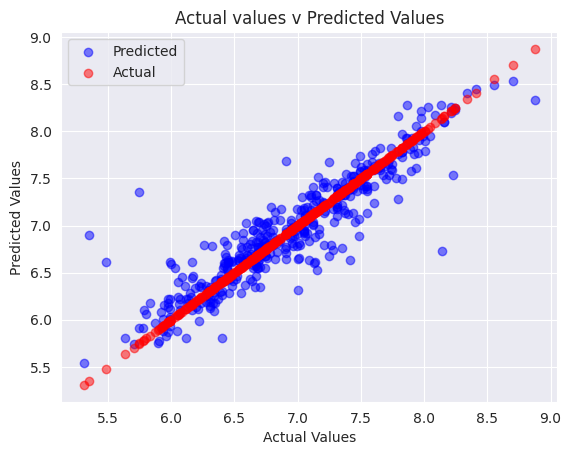

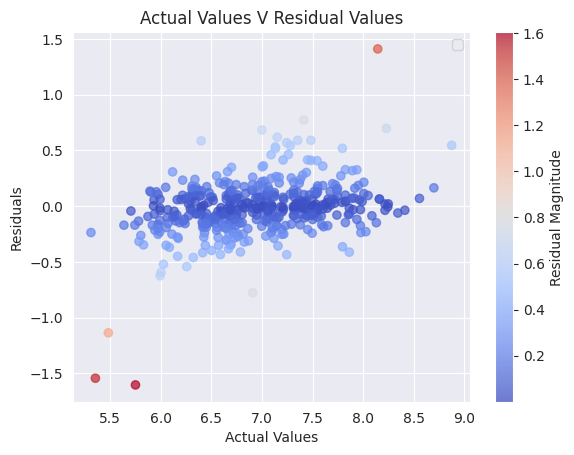

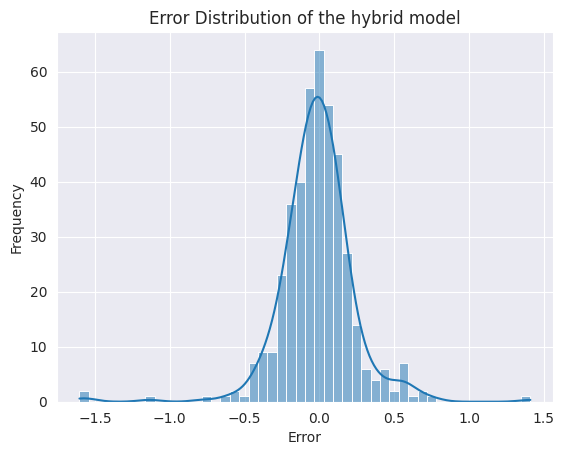

Approximately 81.09% of errors are within one standard deviation of the mean


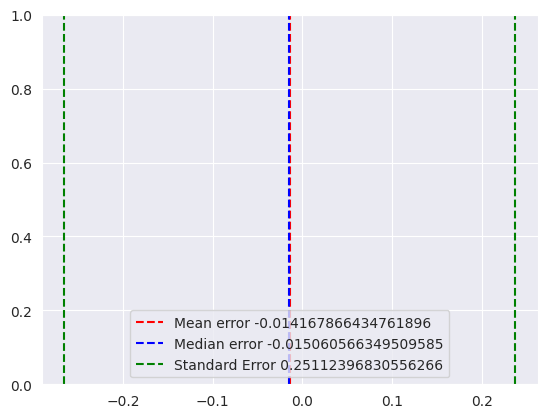

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, random_state=0)

rf.fit(X_train, y_train)

ypred_train= rf.predict(X_train)

ypred_test= rf.predict(X_test)

xgb_model = xgb.XGBRegressor(objective= "reg:squarederror",
                             alpha= 0.01,
                             gamma= 0.01,
                             reg_lambda= 0.1,
                             max_depth= 6,
                             n_estimators= 150)

xgb_model.fit(X_train, y_train)

xgb_model_ypred_train = xgb_model.predict(X_train)

xgb_model_ypred_test = xgb_model.predict(X_test)

hybrid_ypred_train = (ypred_train + xgb_model_ypred_train) / 2

hybrid_ypred_test = (ypred_test + xgb_model_ypred_test) / 2

#Metrics for the Hybrid Model

hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))

hybrid_r2_score_train = r2_score(y_train, hybrid_ypred_train)

hybrid_r2_score_test = r2_score(y_test, hybrid_ypred_test)

k= 5

hybrid_kfold = KFold(n_splits= k, shuffle= True, random_state= 0)

hybrid_cv = cross_val_score(cv= hybrid_kfold, scoring= 'r2', estimator= rf, X=X, y=y)

print('Hybrid R^2 test(Train):', hybrid_r2_score_train)

print('Hybrid R^2 test(Test):', hybrid_r2_score_test)

print('Hybrid RMSE (Test):', hybrid_rmse_test)

print('Hybrid Cross Validation Test:', hybrid_cv.mean())


#Plotting the Metrics for the Hybrid Model

plt.scatter(y_test, hybrid_ypred_test, c= 'b', label= 'Predicted', alpha= 0.5)

plt.scatter(y_test, y_test, c= 'r', label= 'Actual', alpha= 0.5)

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.title('Actual values v Predicted Values')

plt.legend()

plt.show()

#Calculating the Residuals

residuals = y_test - hybrid_ypred_test

#Defining the colors of the bubbles based on the size of the residuals

colors = np.abs(residuals)

#Visualizing the residuals

plt.scatter(y_test, residuals, c= colors, cmap= 'coolwarm', alpha= 0.7)

plt.xlabel('Actual Values')

plt.ylabel('Residuals')

plt.legend()

plt.title('Actual Values V Residual Values')

plt.colorbar(label= 'Residual Magnitude')

plt.show()

#Calculating the error

errors = y_test - hybrid_ypred_test

#Visualizing the error using a histplot

sns.histplot(errors, kde= True)

plt.xlabel('Error')

plt.ylabel('Frequency')

plt.title('Error Distribution of the hybrid model')

plt.show()

#Measures of Central Tendency

mean_error = np.mean(errors)

median_error = np.median(errors)

#Measures of Spread

std_error = np.std(errors)

# Calculate the percentage of errors within one standard deviation of the mean

within_one_std = errors[(errors > mean_error - std_error) & (errors < mean_error + std_error)]

percentage = len(within_one_std) / len(errors) * 100

print(f"Approximately {percentage:.2f}% of errors are within one standard deviation of the mean")

#Visualization of the measures of Central Tendencies and Spread

plt.axvline(mean_error, color= 'r', label= f'Mean error {mean_error}', linestyle= '--')

plt.axvline(median_error, color= 'b', label= f'Median error {median_error}', linestyle = '--')

plt.axvline(std_error + mean_error, color= 'g', label= f'Standard Error {std_error}', linestyle= '--')

plt.axvline(mean_error - std_error, color= 'g', linestyle= '--')

plt.legend()

plt.show()



**Light Gradient Boosting Machine and XGBoost**

Hybrid R^2 test(Train): 0.9237192543536314
Hybrid R^2 test(Test): 0.8454778251272914
Hybrid RMSE (Test): 0.2463797254798255
Hybrid Cross Validation Test: 0.43843977188839467


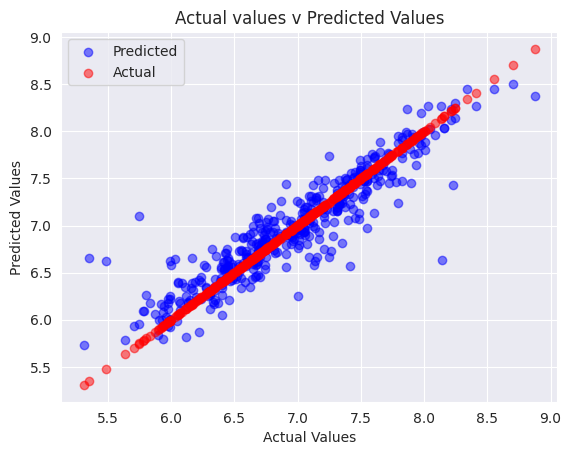

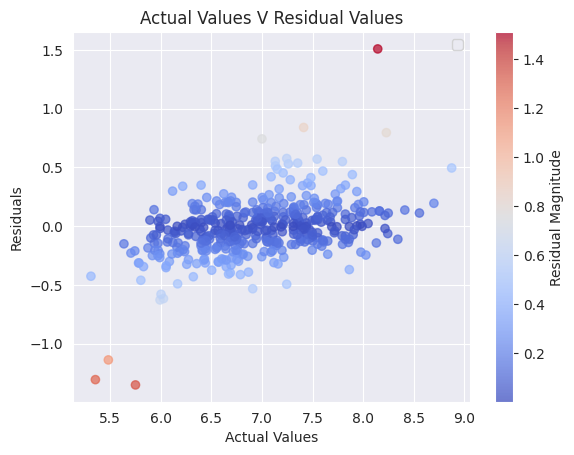

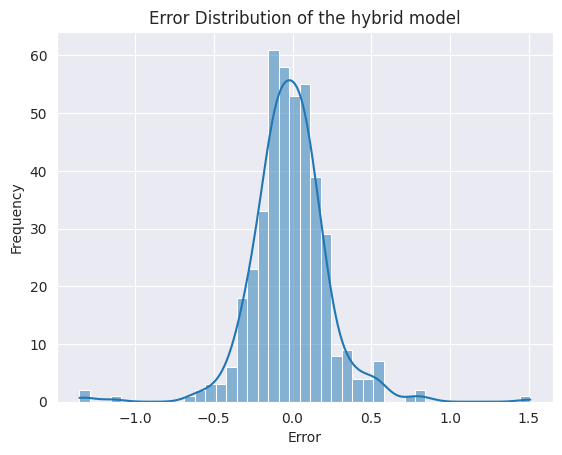

Approximately 80.14% of errors are within one standard deviation of the mean


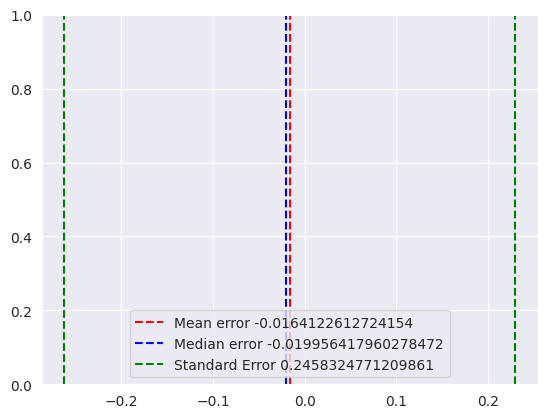

In [ ]:
import lightgbm as lgbm

lgb = lgbm.LGBMRegressor(n_estimators= 100, max_depth= 2, random_state= 0)

lgb.fit(X_train, y_train)

lgb_ypred_train = lgb.predict(X_train)

lgb_ypred_test = lgb.predict(X_test)

hybrid_lgb_pred_train = (lgb_ypred_train + xgb_model_ypred_train) / 2

hybrid_lgb_pred_test = (lgb_ypred_test + xgb_model_ypred_test) / 2

#Metrics for the Hybrid Model

hybrid_lgb_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_lgb_pred_test))

hybrid_lgb_r2_score_train = r2_score(y_train, hybrid_lgb_pred_train)

hybrid_lgb_r2_score_test = r2_score(y_test, hybrid_lgb_pred_test)

k= 5

hybrid_lgb_kfold = KFold(n_splits= k, shuffle= True, random_state= 0)

hybrid_lgb_cv = cross_val_score(cv= hybrid_lgb_kfold, scoring= 'r2', estimator= lgb, X=X, y=y)

print('Hybrid R^2 test(Train):', hybrid_lgb_r2_score_train)

print('Hybrid R^2 test(Test):', hybrid_lgb_r2_score_test)

print('Hybrid RMSE (Test):', hybrid_lgb_rmse_test)

print('Hybrid Cross Validation Test:', hybrid_lgb_cv.mean())


#Plotting the Metrics for the Hybrid Model

plt.scatter(y_test, hybrid_lgb_pred_test, c= 'b', label= 'Predicted', alpha= 0.5)

plt.scatter(y_test, y_test, c= 'r', label= 'Actual', alpha= 0.5)

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.title('Actual values v Predicted Values')

plt.legend()

plt.show()

#Calculating the Residuals

residuals = y_test - hybrid_lgb_pred_test

#Defining the colors of the bubbles based on the size of the residuals

colors = np.abs(residuals)

#Visualizing the residuals

plt.scatter(y_test, residuals, c= colors, cmap= 'coolwarm', alpha= 0.7)

plt.xlabel('Actual Values')

plt.ylabel('Residuals')

plt.legend()

plt.title('Actual Values V Residual Values')

plt.colorbar(label= 'Residual Magnitude')

plt.show()

#Calculating the error

errors = y_test - hybrid_lgb_pred_test

#Visualizing the error using a histplot

sns.histplot(errors, kde= True)

plt.xlabel('Error')

plt.ylabel('Frequency')

plt.title('Error Distribution of the hybrid model')

plt.show()

#Measures of Central Tendency

mean_error = np.mean(errors)

median_error = np.median(errors)

#Measures of Spread

std_error = np.std(errors)

# Calculate the percentage of errors within one standard deviation of the mean
within_one_std = errors[(errors > mean_error - std_error) & (errors < mean_error + std_error)]

percentage = len(within_one_std) / len(errors) * 100

print(f"Approximately {percentage:.2f}% of errors are within one standard deviation of the mean")


#Visualization of the measures of Central Tendencies and Spread

plt.axvline(mean_error, color= 'r', label= f'Mean error {mean_error}', linestyle= '--')

plt.axvline(median_error, color= 'b', label= f'Median error {median_error}', linestyle = '--')

plt.axvline(std_error + mean_error, color= 'g', label= f'Standard Error {std_error}', linestyle= '--')

plt.axvline(mean_error - std_error, color= 'g', linestyle= '--')

plt.legend()

plt.show()


**Visualizing the Best Model XGBoost**

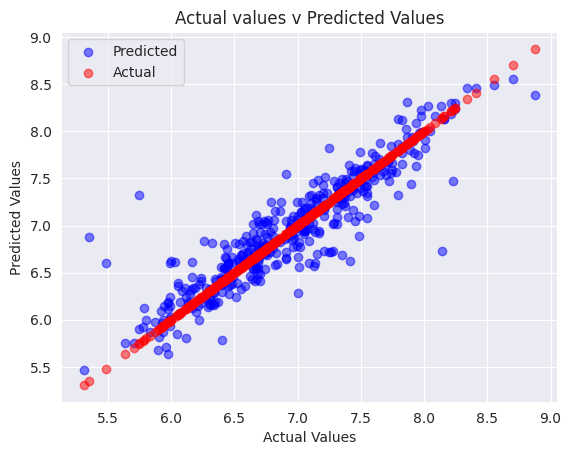

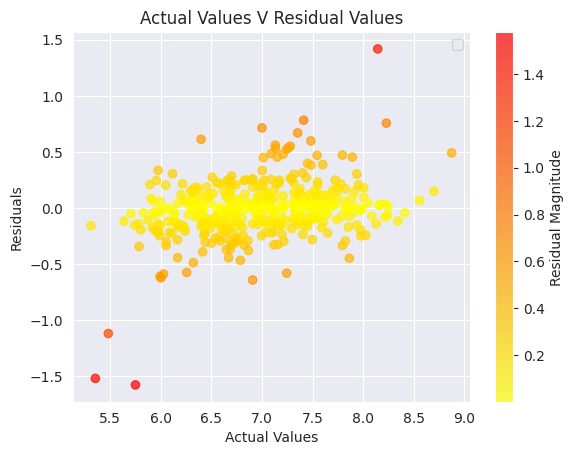

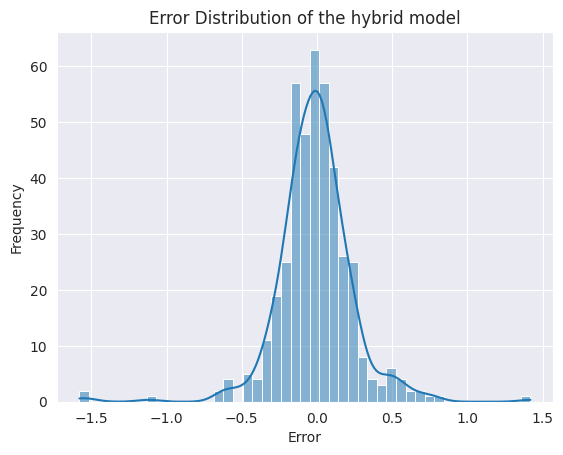

Approximately 79.91% of errors are within one standard deviation of the mean


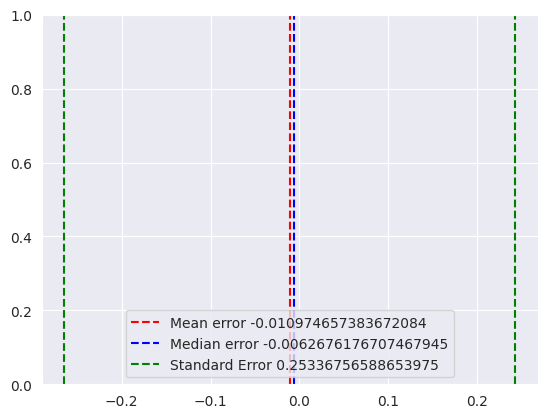

In [ ]:

#Plotting the Metrics for the Hybrid Model

plt.scatter(y_test, xgb_model_ypred_test, c= 'b', label= 'Predicted', alpha= 0.5)

plt.scatter(y_test, y_test, c= 'r', label= 'Actual', alpha= 0.5)

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.title('Actual values v Predicted Values')

plt.legend()

plt.show()

#Calculating the Residuals

residuals = y_test - xgb_model_ypred_test

#Defining the colors of the bubbles based on the size of the residuals

colors = np.abs(residuals)

#Visualizing the residuals

plt.scatter(y_test, residuals, c= colors, cmap= 'autumn_r', alpha= 0.7)

plt.xlabel('Actual Values')

plt.ylabel('Residuals')

plt.legend()

plt.title('Actual Values V Residual Values')

plt.colorbar(label= 'Residual Magnitude')

plt.show()

#Calculating the error

errors = y_test - xgb_model_ypred_test

sns.histplot(errors, kde= True)

plt.xlabel('Error')

plt.ylabel('Frequency')

plt.title('Error Distribution of the hybrid model')

plt.show()

#Measures of Central Tendency

mean_error = np.mean(errors)

median_error = np.median(errors)

#Measures of Spread

std_error = np.std(errors)

# Calculate the percentage of errors within one standard deviation of the mean

within_one_std = errors[(errors > mean_error - std_error) & (errors < mean_error + std_error)]

percentage = len(within_one_std) / len(errors) * 100

print(f"Approximately {percentage:.2f}% of errors are within one standard deviation of the mean")

#Visualizing the error using a histplot

#Visualization of the measures of Central Tendencies and Spread

plt.axvline(mean_error, color= 'r', label= f'Mean error {mean_error}', linestyle= '--')

plt.axvline(median_error, color= 'b', label= f'Median error {median_error}', linestyle = '--')

plt.axvline(std_error + mean_error, color= 'g', label= f'Standard Error {std_error}', linestyle= '--')

plt.axvline(mean_error - std_error, color= 'g', linestyle= '--')

plt.legend()

plt.show()

